In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors

# KNN 실습

In [3]:
iris = sns.load_dataset('iris')

In [4]:
# MinMaxScaler로 정규화하기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [7]:
iris[features] = scaler.fit_transform(iris[features])

In [8]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


In [9]:
# 데이터를 훈련데이터와 테스트데이터로 나누기
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(iris, test_size = 0.3, random_state = 1)

In [10]:
df_train

,sepal_length,sepal_width,petal_length,petal_width,species
118,0.944444,0.250000,1.000000,0.916667,virginica
18,0.388889,0.750000,0.118644,0.083333,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
45,0.138889,0.416667,0.067797,0.083333,setosa
59,0.250000,0.291667,0.491525,0.541667,versicolor
...,...,...,...,...,...
133,0.555556,0.333333,0.694915,0.583333,virginica
137,0.583333,0.458333,0.762712,0.708333,virginica
72,0.555556,0.208333,0.661017,0.583333,versicolor
140,0.666667,0.458333,0.779661,0.958333,virginica


In [12]:
df_test.shape

(45, 5)

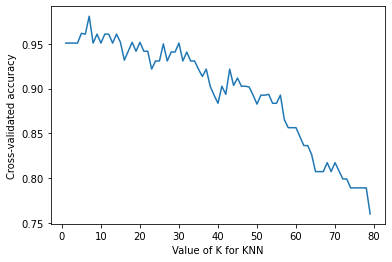

In [17]:
#최적 k 찾기
from sklearn.model_selection import cross_val_score

k_range = np.arange(1, 80)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, df_train[features], df_train['species'], cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()


In [20]:
result = pd.DataFrame()
result['k'] = k_range
result['accuracy'] = k_scores
result = result.sort_values(by = 'accuracy', ascending = False).reset_index(drop = True)
result

,k,accuracy
0,7,0.980909
1,5,0.961818
2,14,0.960909
3,6,0.960909
4,9,0.960909
...,...,...
74,75,0.789091
75,76,0.789091
76,77,0.789091
77,78,0.789091


In [22]:
# 위 과정에서 얻은 최적 k로 테스트 데이터의 label 예측하기
classifier = neighbors.KNeighborsClassifier(result['k'][0])
classifier.fit(df_train[features], df_train['species'])
pred = classifier.predict(df_test[features])

In [23]:
# 분류결과 및 accuracy 확인하기
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(df_test['species'], pred))
print(accuracy_score(df_test['species'], pred))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
0.9555555555555556


# SVM

## 2차원 데이터를 3차원으로 매핑하고 결정경계 생성

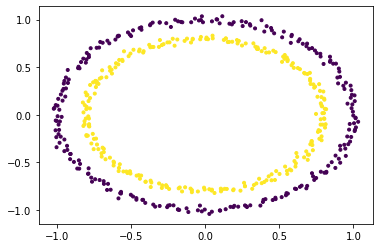

In [38]:
## 데이터 생성
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

# generating data
X, Y = make_circles(n_samples = 500, noise = 0.02)

# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.') # X : 좌표, y : 클래스
plt.show()

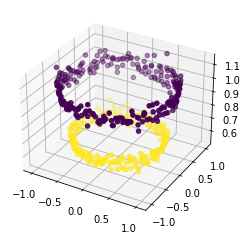

In [39]:
## 차원 변경
# adding a new dimension to X
X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))
X3 = (X1**2 + X2**2)
X = np.hstack((X, X3))

# visualizing data in higher dimension
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
plt.show()

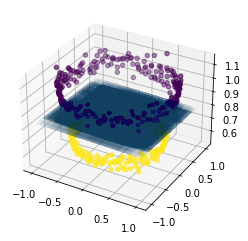

In [40]:
## 데이터 분류
# create support vector classifier using a linear kernel
from sklearn import svm

svc = svm.SVC(kernel = 'linear')
svc.fit(X, Y)
w = svc.coef_
b = svc.intercept_

# plotting the seperating hyperplane
x1 = X[:, 0].reshape((-1, 1))
x2 = X[:, 1].reshape((-1, 1))
x1, x2 = np.meshgrid(x1, x2)
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2]

fig = plt.figure()
axes2 = fig.add_subplot(111, projection = '3d')
axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
axes1 = fig.gca(projection = '3d')
axes1.plot_surface(x1, x2, x3, alpha = 0.01)
plt.show()


## SVM 실습

In [52]:
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

In [53]:
df.shape

(100, 8)

In [54]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [55]:
# 현재 가지고 있는 데이터에서 포지션의 개수 확인
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'STL and 2P in 2d plane')

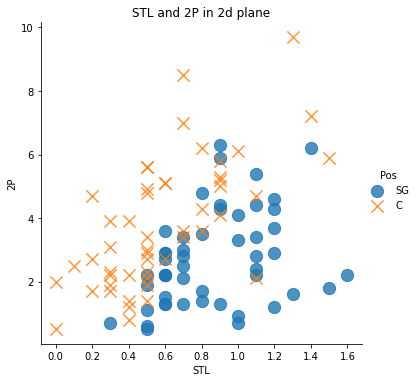

In [56]:
# 스틸, 2점슛 데이터 시각화
sns.lmplot('STL', '2P', data= df, fit_reg = False, 
          scatter_kws = {"s": 150},  # 좌표 상의 점의 크기
          markers = ['o', 'x'],
          hue = "Pos") # 예측값

# title
plt.title('STL and 2P in 2d plane')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'AST and 2P in 2d plane')

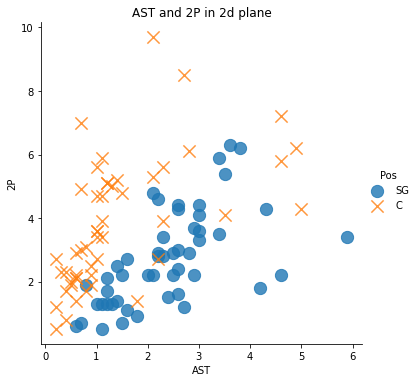

In [57]:
# 어시스트, 2점슛 데이터 시각화
sns.lmplot('AST', '2P', data= df, fit_reg = False, 
          scatter_kws = {"s": 150},  # 좌표 상의 점의 크기
          markers = ['o', 'x'],
          hue = "Pos") # 예측값

# title
plt.title('AST and 2P in 2d plane')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'BLK and 3P in 2d plane')

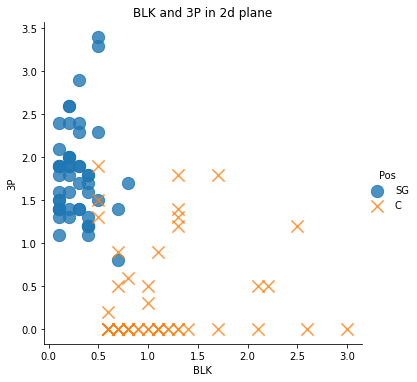

In [58]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK', '3P', data= df, fit_reg = False, 
          scatter_kws = {"s": 150},  # 좌표 상의 점의 크기
          markers = ['o', 'x'],
          hue = "Pos") # 예측값

# title
plt.title('BLK and 3P in 2d plane')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TRB and 3P in 2d plane')

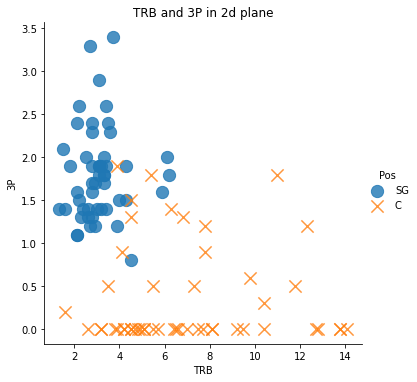

In [59]:
# 어시스트, 2점슛 데이터 시각화
sns.lmplot('TRB', '3P', data= df, fit_reg = False, 
          scatter_kws = {"s": 150},  # 좌표 상의 점의 크기
          markers = ['o', 'x'],
          hue = "Pos") # 예측값

# title
plt.title('TRB and 3P in 2d plane')

In [60]:
# 분별력이 없는 특징(feature)을 데이터에서 제거
df.drop(['2P', 'AST', 'STL'], axis = 1, inplace = True)
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [61]:
# 2차원 데이터로 바꾸기 위해 TRB를 제거하여 다시 df로 저장
df.drop('TRB', axis = 1, inplace = True)
df.head()

,Player,Pos,3P,BLK
0,Alex Abrines,SG,1.4,0.1
1,Steven Adams,C,0.0,1.0
2,Alexis Ajinca,C,0.0,0.6
3,Chris Andersen,C,0.0,0.6
4,Will Barton,SG,1.5,0.5


In [62]:
## SVM 결정
# 3P, BLK X로 저장
# 포지션 값은 Y로 저장
X = df[['3P', 'BLK']]
Y = df[['Pos']]

In [64]:
## 선형 SVM
from sklearn.svm import SVC
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'로 선형 분리 진행
svm_clf_l = SVC(kernel = 'linear')

# 교차검증
scores_l = cross_val_score(svm_clf_l, X, Y, cv = 5)
scores_l

print('교차검증 평균:', scores_l.mean())
print(pd.DataFrame(cross_validate(svm_clf_l, X, Y, cv = 5)))

교차검증 평균: 0.96
   fit_time  score_time  test_score
0  0.002992    0.001993        1.00
1  0.002993    0.001994        0.95
2  0.004987    0.001994        0.95
3  0.003990    0.001994        1.00
4  0.002992    0.004988        0.90


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [67]:
## 비선형 SVM
svm_clf_r = SVC(kernel = 'rbf')

# 교차검증
scores_r = cross_val_score(svm_clf_r, X, Y, cv = 5)

print('교차검증 평균 : ', scores_r.mean())
print(pd.DataFrame(cross_validate(svm_clf_r, X, Y, cv = 5)))

교차검증 평균 :  0.95
   fit_time  score_time  test_score
0  0.006984    0.001995        1.00
1  0.002990    0.001994        0.90
2  0.002992    0.002992        0.95
3  0.003991    0.001992        1.00
4  0.002992    0.001994        0.90


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

--> 선형/비선형 차이가 없으므로 비선형으로 진행

In [71]:
## 학습 / 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split

# 데이터에서 20%를 테스트 데이터로 분류
train, test = train_test_split(df, test_size = 0.2, random_state = 100)

In [74]:
print(train.shape)
print(test.shape)

(80, 4)
(20, 4)


In [76]:
## 최적의 SVM 파라미터 찾기
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [77]:
def svc_param_selection(X, y, nfolds):
    svm_parameters = [
        {'kernel' : ['rbf'],
        'gamma' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
        'C' : [0.01, 0.1, 1, 10, 100, 1000]
        }
    ]
    clf = GridSearchCV(SVC(), svm_parameters, cv = 10)
    clf.fit(X_train, y_train.values.ravel()) # ravel : 1차원 배열로 만듦
    print(clf.best_params_)
    
    return clf

In [80]:
X_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

# 최적의 파라미터를 sklearn의 gridsearch를 통해 구한다.
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)


{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [84]:
## 결정경계 시각화
# 시각화할 비용 후보들을 저장
C_candidates = []
C_candidates.append(clf.best_params_['C'] * 0.01)
C_candidates.append(clf.best_params_['C'])
C_candidates.append(clf.best_params_['C'] * 100)
# 시각화할 감마 후보들을 저장
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)

# 3점슛과 블로킹 횟수로 학습
X = train[['3P', 'BLK']]
# 농구선수 포지션을 학습 모델의 분류값으로 사용
Y = train['Pos'].tolist()

<ipython-input-86-129ddf8a62eb>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap = plt.cm.RdBu)
<ipython-input-86-129ddf8a62eb>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap = plt.cm.RdBu)
<ipython-input-86-129ddf8a62eb>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with 

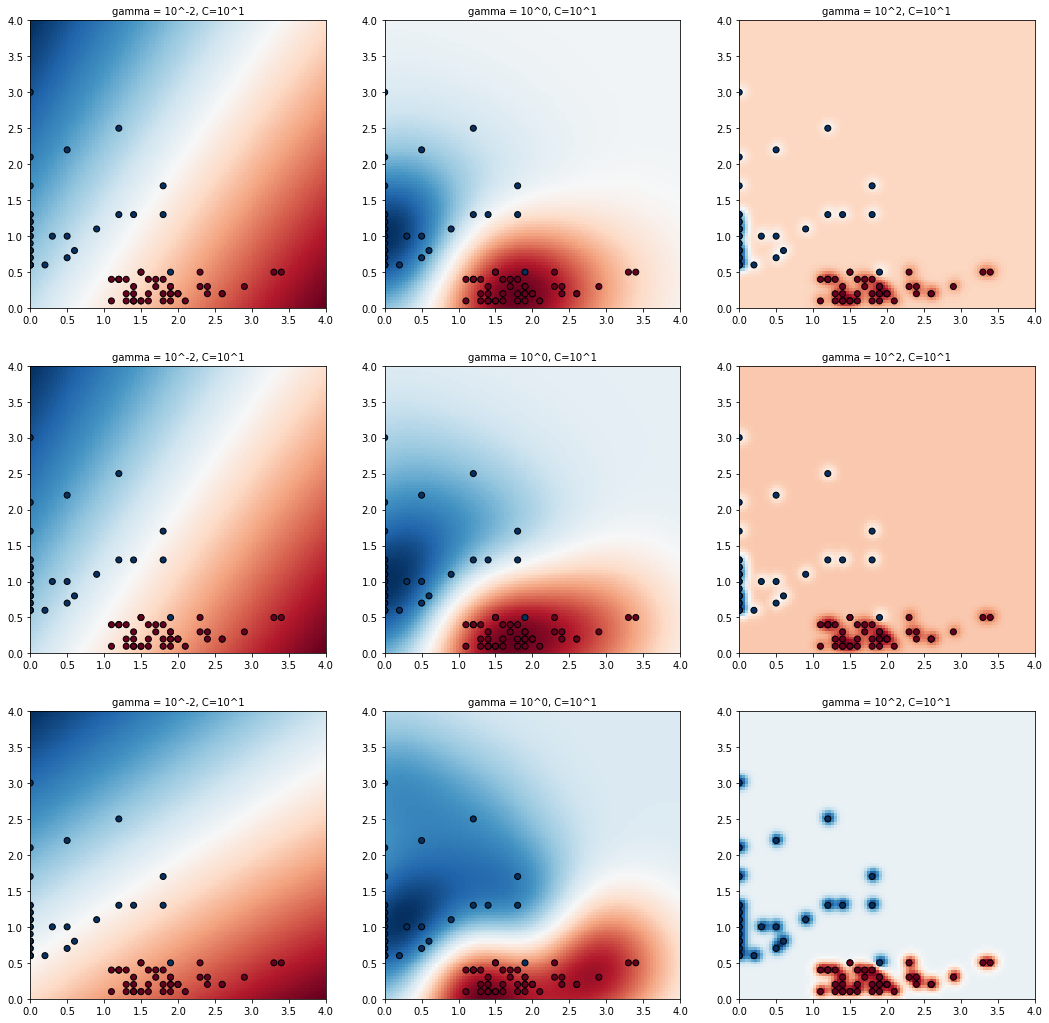

In [86]:
# 포지션에 해당하는 문자열 SG와 C를 벡터화, 센터(C) : 0, 슈팅가드(SG) : 1
position = []
for gt in Y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

# 각각의 파라미터에 해당하는 SVM 모델을 만들어 classifiers에 저장
classifiers = []
for C in C_candidates:
    for gamma in gamma_candidates:
        clf = SVC(C=C, gamma = gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf)) # 모델을 학습한 후 classifiers에 저장
    
# 18, 18 사이즈의 차트를 구성
plt.figure(figsize = (18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))
# 각각의 모델들에 대한 결정 경계 함수를 적용하여 함께 시각화
for(k, (c, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 최적의 모델을 포함한 다른 파라미터로 학습된 모델들을 함께 시각화
    plt.subplot(len(C_candidates), len(gamma_candidates), k+1)
    plt.title('gamma = 10^%d, C=10^%d' % (np.log10(gamma), np.log10(C)), size = 'medium')
    
    # 서포트 벡터와 결정경계선을 시각화
    plt.pcolormesh(xx, yy, -Z, cmap = plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c = position, cmap = plt.cm.RdBu_r, edgecolors = 'k')


In [88]:
## 모델 테스트
# 테스트에 사용될 특징 변수를 X_test에 저장
X_test = test[['3P', 'BLK']]

# 특징으로 예측한 값과 비교할 변수를 Y_test에 저장
Y_test = test[['Pos']]

# 최적의 파라미터로 완성된 SVM에 테스트 데이터를 주입하여 실제값과 예측값을 얻음
y_true, y_pred = Y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))
print()
print('accuracy : ' + str(accuracy_score(y_true, y_pred)))

              precision    recall  f1-score   support

           C       0.79      0.92      0.85        12
          SG       0.83      0.62      0.71         8

    accuracy                           0.80        20
   macro avg       0.81      0.77      0.78        20
weighted avg       0.80      0.80      0.79        20


accuracy : 0.8


In [89]:
# 예측값과 실제값의 일치 확인
comperison = pd.DataFrame({'prediction' : y_pred, 'ground_truth' : y_true.values.ravel()})
comperison

,prediction,ground_truth
0,C,C
1,C,C
2,SG,SG
3,SG,SG
4,C,C
5,C,C
6,C,SG
7,C,C
8,C,C
9,SG,SG
